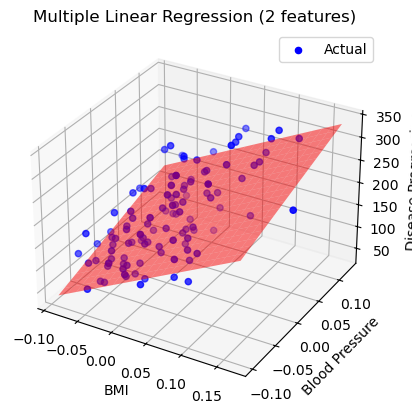

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

diabetes = load_diabetes()
X = diabetes.data[:, [2, 3]]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')

x_surf, y_surf = np.meshgrid(
    np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 20),
    np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 20)
)
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel('BMI')
ax.set_ylabel('Blood Pressure')
ax.set_zlabel('Disease Progression')
ax.set_title('Multiple Linear Regression (2 features)')

plt.legend()
plt.show()
